In [1]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds  = cat["channel_ridge_resolutions_01km"].to_dask()

In [2]:
import matplotlib.pyplot as plt

In [21]:
ds['PH'].isel(Z=0).shape[0]

35

In [5]:
ds['PH'].isel(time=0, XC=0, YC=0)

<xarray.DataArray 'PH' (Z: 76)>
dask.array<getitem, shape=(76,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    Depth    float32 dask.array<chunksize=(), meta=np.ndarray>
    PHrefC   (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    XC       float32 500.0
    YC       float32 500.0
  * Z        (Z) float32 -0.5 -1.57 -2.79 ... -2.626e+03 -2.757e+03 -2.913e+03
    drF      (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    hFacC    (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>
    maskC    (Z) bool dask.array<chunksize=(1,), meta=np.ndarray>
    rA       float32 dask.array<chunksize=(), meta=np.ndarray>
    time     timedelta64[ns] 550 days
Attributes:
    long_name:      Hydrostatic Pressure Pot.(p/rho) Anomaly
    standard_name:  sea_water_dynamic_pressue
    units:          m2 s-2

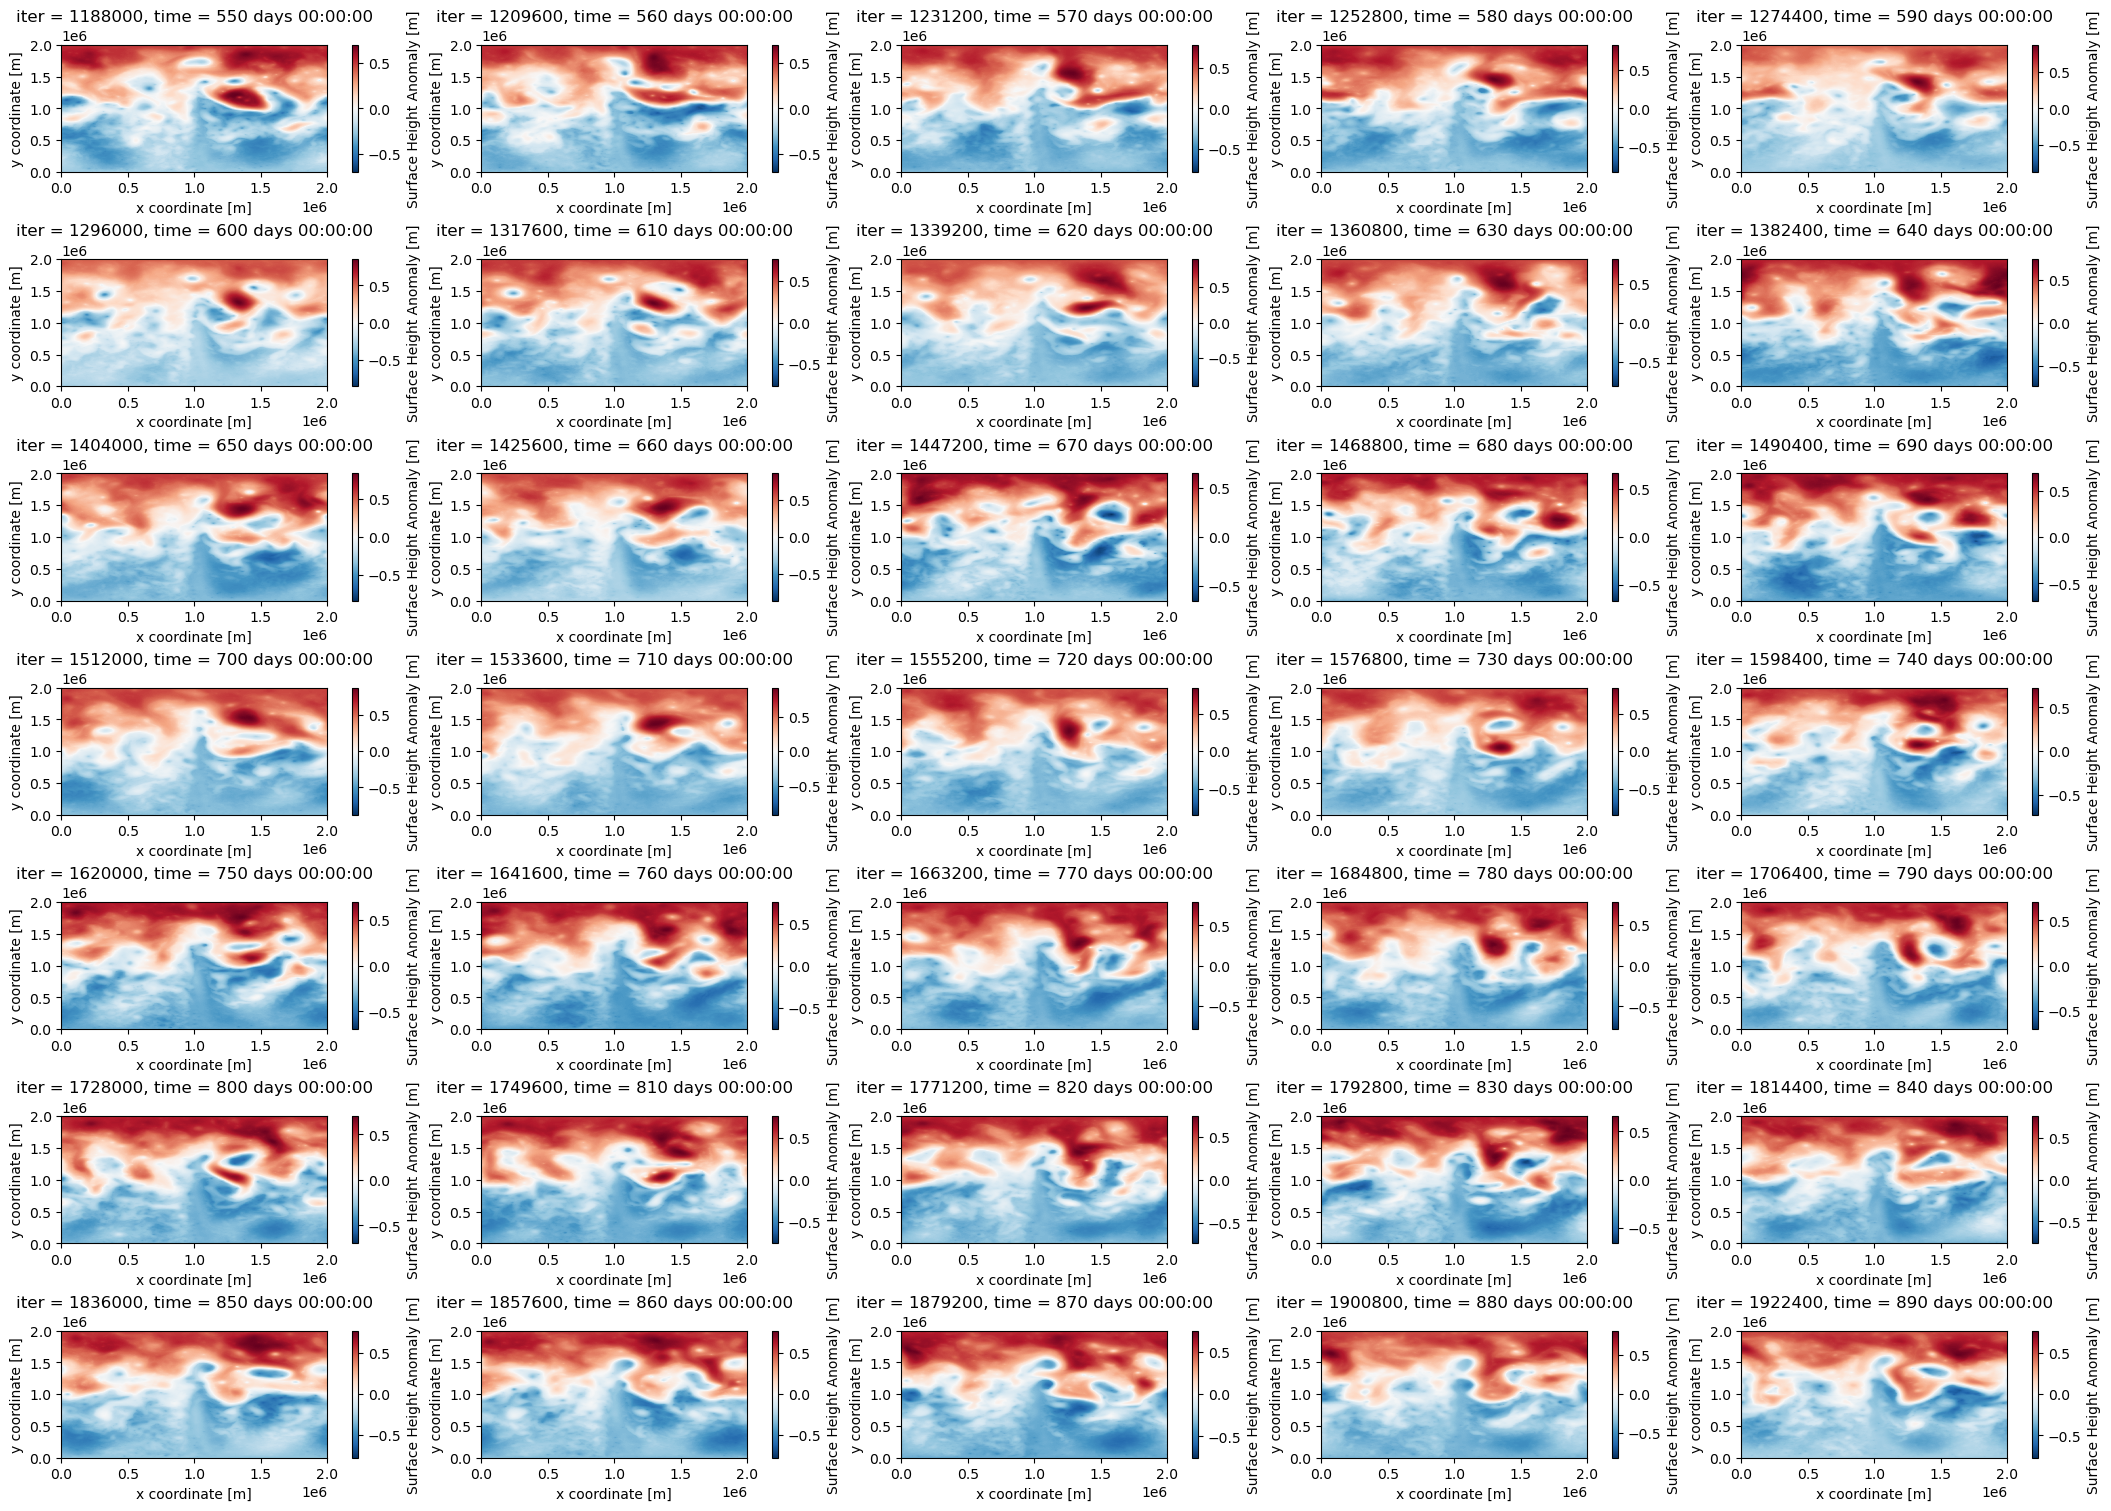

In [6]:
fig, axes = plt.subplots(ncols=5, nrows=7, figsize=(21, 15), constrained_layout=True)
for idx in range(35):
    i, j = divmod(idx, 5)
    ds['Eta'].isel(time=idx).plot(ax=axes[i, j])
plt.show()

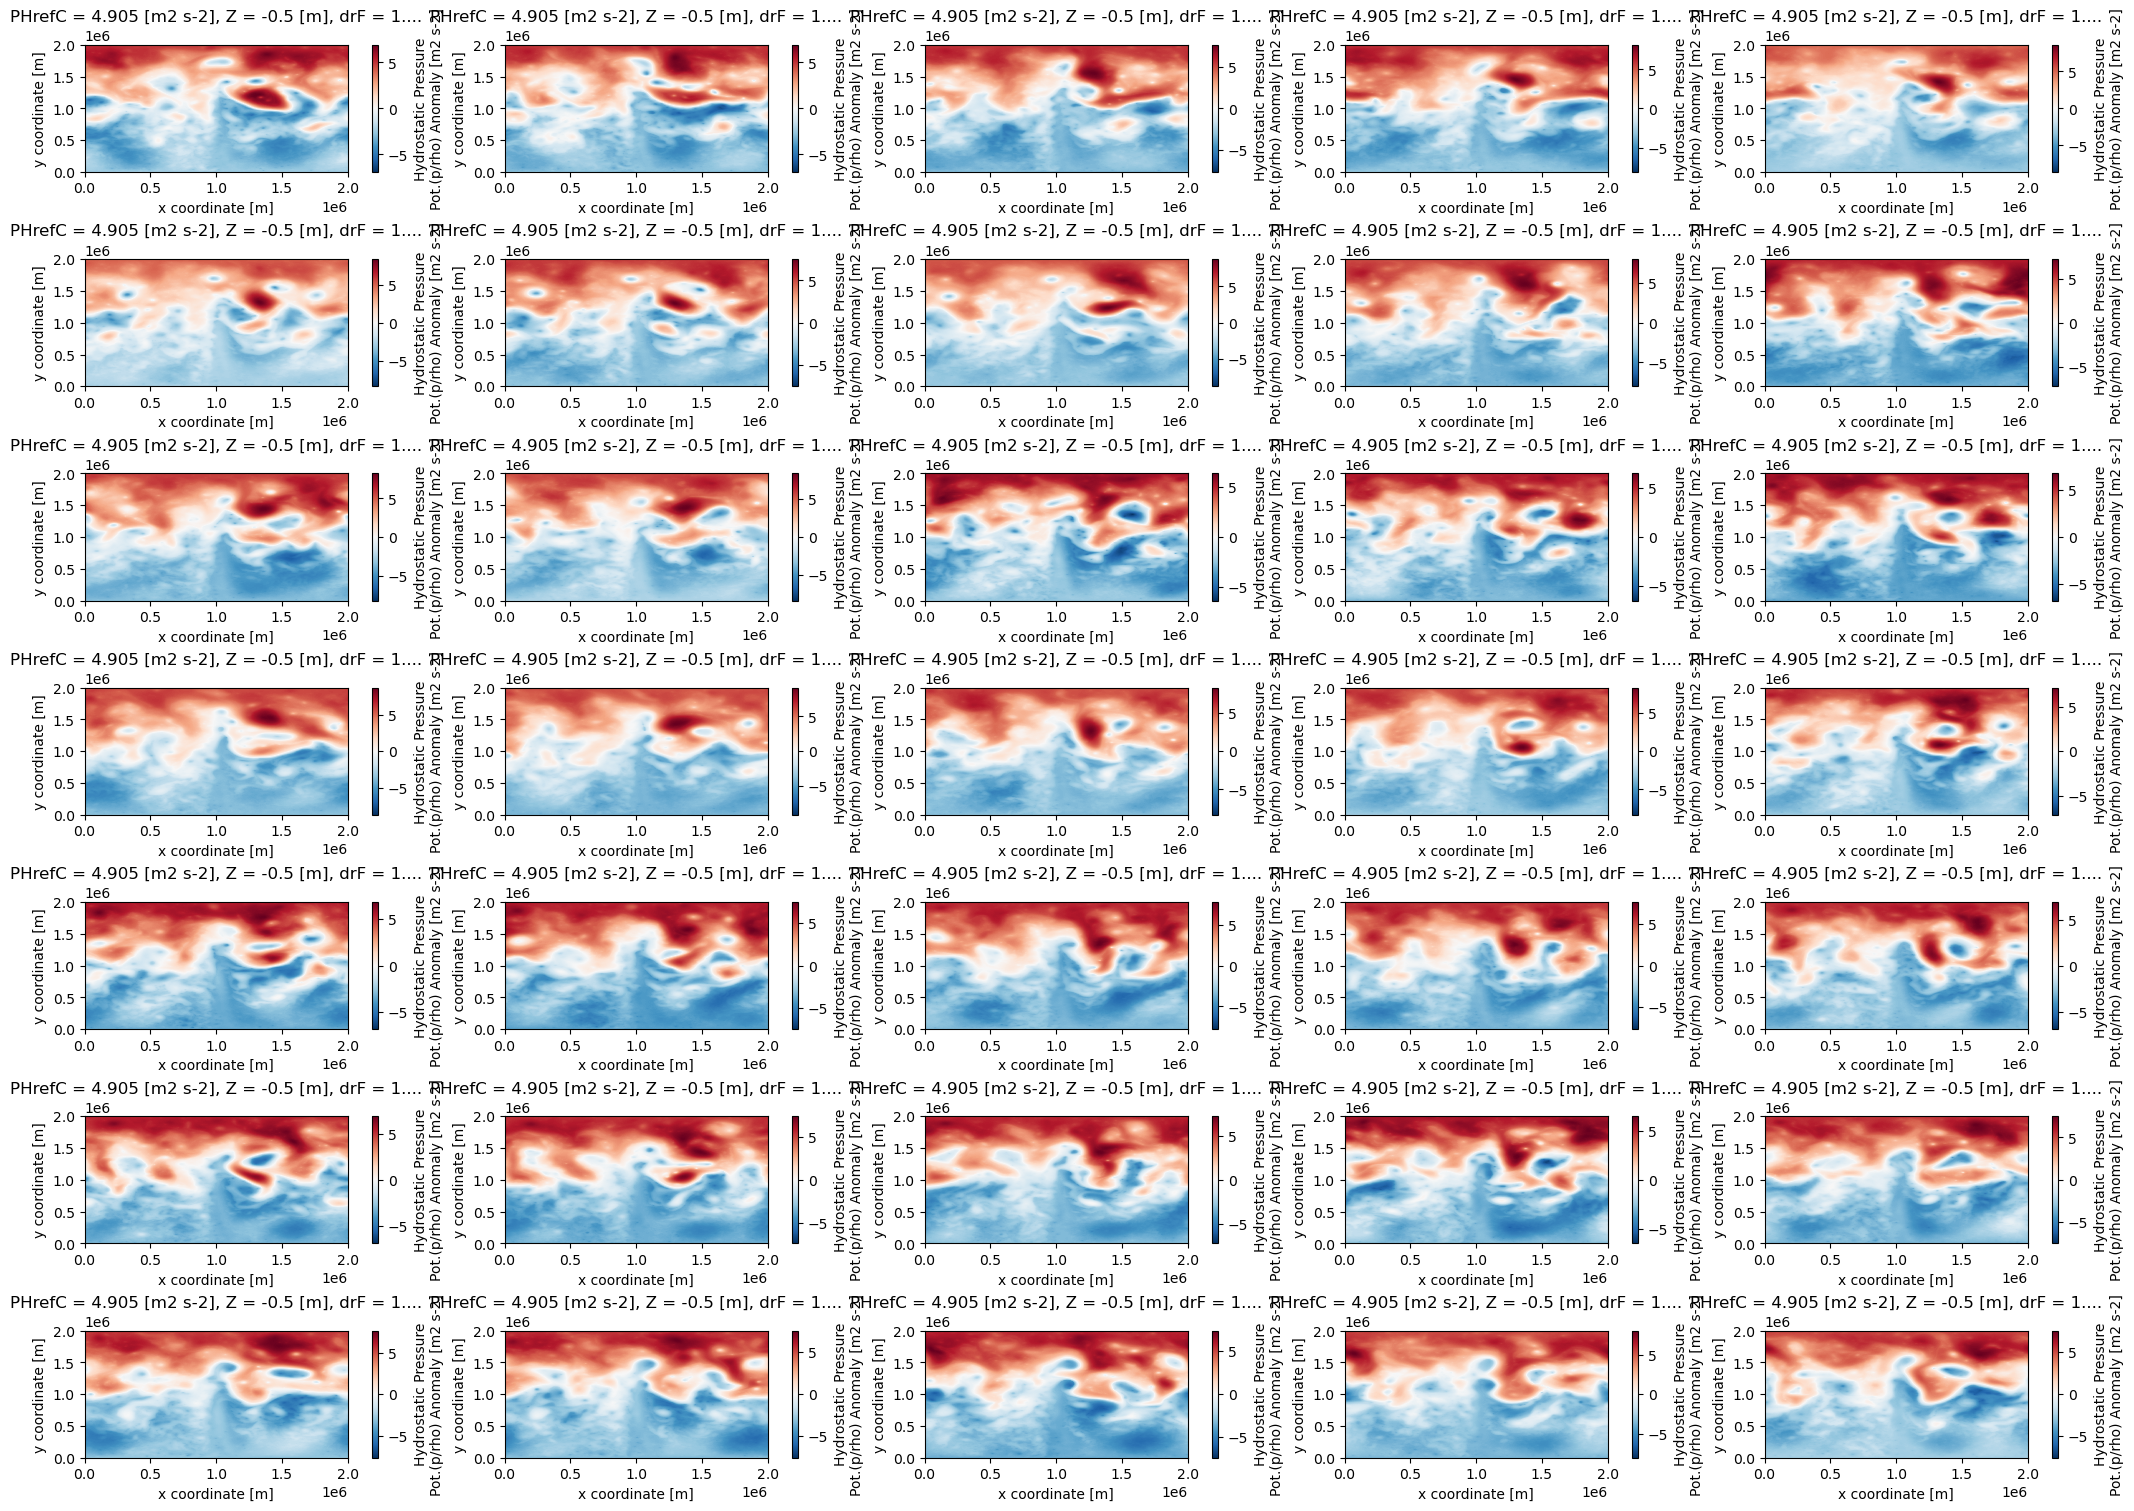

In [7]:
fig, axes = plt.subplots(ncols=5, nrows=7, figsize=(21, 15), constrained_layout=True)
for idx in range(35):
    i, j = divmod(idx, 5)
    ds['PH'].isel(time=idx, Z=0).plot(ax=axes[i, j])
plt.show()

In [17]:
# import os
import numpy as np
import torch
from torch.utils.data import Dataset
# from PIL import Image
from torchvision.transforms import Compose, ToTensor, Normalize, ColorJitter, RandomHorizontalFlip, ToPILImage

In [28]:
class MITgcm_Channel_Sim(Dataset):

    def __init__(self, dataset, split, joint_transform=None):
        super(MITgcm_Channel_Sim, self).__init__()
        self.dataset = dataset
        self.split = split

        self.inputs, self.targets = self._get_data_array()
        self.joint_transform = joint_transform

        mean_std = ([0.5,], [0.5,])
        self.input_transforms = Compose([ToTensor(), Normalize(*mean_std)])
        self.target_transforms = Compose([ToTensor(), Normalize(*mean_std)])

    def _get_data_array(self):
        
        from intake import open_catalog

        cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
        ds  = cat[self.dataset].to_dask()
        display(ds)
        
        inputs = ds['Eta']
        targets = ds['PH'].isel(Z=0)
        return inputs, targets

    def __getitem__(self, index):
        
        x = self.inputs.isel(time=0).values
        y = self.targets.isel(time=0).values

        if self.joint_transform:
            x, y = self.joint_transform(x, y)
        x = self.input_transforms(x)
        y = self.target_transforms(y)


        return x, y

    def __len__(self):
        return self.inputs.shape[0]


In [29]:
dataset = MITgcm_Channel_Sim(dataset="channel_ridge_resolutions_01km", split="val")
print(len(dataset))
dataiter = iter(dataset)
image, mask = next(dataiter)
print(image.shape, mask.shape)

<xarray.Dataset>
Dimensions:              (YC: 2000, XC: 2000, time: 35, Z: 76, Zp1: 77,
                          XG: 2000, YG: 2000, Zl: 76, Zu: 76,
                          layer_1TH_bounds: 43, layer_1TH_center: 42,
                          layer_1TH_interface: 41)
Coordinates: (12/32)
    Depth                (YC, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    PHrefC               (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF               (Zp1) float32 dask.array<chunksize=(77,), meta=np.ndarray>
  * XC                   (XC) float32 500.0 1.5e+03 2.5e+03 ... 1.998e+06 2e+06
  * XG                   (XG) float32 0.0 1e+03 2e+03 ... 1.998e+06 1.999e+06
  * YC                   (YC) float32 500.0 1.5e+03 2.5e+03 ... 1.998e+06 2e+06
    ...                   ...
    maskW                (Z, YC, XG) bool dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    rA                   (YC, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    rAs                  (YG, XC) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    rAw                  (YC, XG) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    rAz                  (YG, XG) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
  * time                 (time) timedelta64[ns] 550 days 560 days ... 890 days
Data variables:
    Eta                  (time, YC, XC) float32 dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    PH                   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    PTRACER01            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    T                    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    U                    (time, Z, YC, XG) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    V                    (time, Z, YG, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>
    W                    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 1, 2000, 2000), meta=np.ndarray>

35
torch.Size([1, 2000, 2000]) torch.Size([1, 2000, 2000])
